# Logistic Regression
### Classification
Instead of our output vector y being a continuous range of values, it will only be 0 or 1.

$$\large y \in \lbrace 0,1 \rbrace$$

Where 0 is usually taken as the "negative class" and 1 as the "positive class".
One method is to use linear regression and map all predictions greater than 0.5 as a 1 and all less than 0.5 as a 0. This method doesn't work well because classification is not actually a linear function.

### Hypothesis Representation
Our hypothesis should satisfy:
$$\large 0 \leq h_\theta (x) \leq 1 $$

Our new form uses the "Sigmoid Function," also called the "Logistic Function":

$$
\large
\begin{align*}
& h_\theta (x) =  g ( \theta^T x ) \newline \newline
& z = \theta^T x \newline
& g(z) = \dfrac{1}{1 + e^{-z}}
\end{align*}$$

We start with our old hypothesis (linear regression), except that we want to restrict the range to 0 and 1. This is accomplished by plugging $\theta^T X$ into the Logistic Function.
$h_\theta$ will give us the probability that our output is 1. For example, $h_\theta(x)=0.7$ gives us the probability of 70% that our output is 1.

The **decision boundary** is the line that separates the area where $y=0$ and where $y=1$. It is created by our hypothesis function.

$$
\begin{align*}
& \theta^T x \geq 0 \rightarrow y = 1 \newline
& \theta^T x < 0 \rightarrow y = 0 \newline
\end{align*}
$$

### Cost Function
We cannot use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function.
Instead, our cost function for logistic regression looks like:
$$
\large
\begin{align*}
& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline
& \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline
& \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}
\end{align*}$$

The more our hypothesis is off from y, the larger the cost function output. If our hypothesis is equal to y, then our cost is 0:

$$
\begin{align*}
& \mathrm{Cost}(h_\theta(x),y) = 0 \text{  if  } h_\theta(x) = y \newline
& \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{  if  } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline
& \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{  if  } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline
\end{align*}
$$

If our correct answer 'y' is 0, then the cost function will be 0 if our hypothesis function also outputs 0. If our hypothesis approaches 1, then the cost function will approach infinity.
If our correct answer 'y' is 1, then the cost function will be 0 if our hypothesis function outputs 1. If our hypothesis approaches 0, then the cost function will approach infinity.
Note that writing the cost function in this way guarantees that J(θ) is convex for logistic regression.

### Simplified Cost Function and Gradient Descent
We can compress our cost function's two conditional cases into one case:

$$  \mathrm{Cost}(h_\theta(x),y) = - y \; \log(h_\theta(x)) - (1 - y) \log(1 - h_\theta(x)) $$

Notice that when $y$ is equal to $1$, then the second term $((1−y)log(1−h_\theta(x)))$ will be zero and will not affect the result. If $y$ is equal to $0$, then the first term $(−ylog(h_\theta(x)))$ will be zero and will not affect the result.

We can fully write it out as:

$$ 
\large
J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))] $$

and in vector form:

$$ 
\large
J\left(\theta\right)  =  -\frac{1}{m}\left(\log\left(g\left(X\theta\right)\right)^{T}y+\log\left(1-g\left(X\theta\right)\right)^{T}\left(1-y\right)\right) $$

### Gradient Descent
Remember the general form of gradient descent is:

$$ 
\begin{align*}
& Repeat \; \lbrace \newline
& \; \theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j}J(\theta) \newline
& \rbrace
\end{align*}$$


We can work out the derivative part using calculus to get:

$$ 
\begin{align*}
& Repeat \; \lbrace \newline
& \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace
\end{align*} $$

Notice that this algorithm is identical to the one we used in linear regression. We still have to simultaneously update all values in theta.
A vectorized implementation is:
$$ 
\large
\theta := \theta - \frac{\alpha}{m} X^{T} (g(X \theta ) - \vec{y}) $$

### Multiple Classification
Now we will approach the classification of data into more than two categories. Instead of y = {0,1} we will expand our definition so that y = {0,1...n}.
In this case we divide our problem into n+1 binary classification problems; in each one, we predict the probability that 'y' is a member of one of our classes.

$$
\large
\begin{align*}
& y \in \lbrace0, 1 ... n\rbrace \newline
& h_\theta^{(0)}(x) = P(y = 0 | x ; \theta) \newline
& h_\theta^{(1)}(x) = P(y = 1 | x ; \theta) \newline
& \cdots \newline
& h_\theta^{(n)}(x) = P(y = n | x ; \theta) \newline
& \mathrm{prediction} = \max_i( h_\theta ^{(i)}(x) )\newline
\end{align*} $$

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction.

# Assignment 2

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from pandas.tools.plotting import scatter_matrix
import scipy as sp

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

First, we'll read in the exam data:

In [3]:
data = pd.read_csv('Exercises_2/ex2/ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])

Let's add in $x_0$ to make the dot product of $X$ and $\theta$ possible: ($X \cdot \theta$)

In [4]:
data.insert(0, 'x0', value=np.ones([len(data),1]))

In [5]:
data.head()

,x0,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


Let's plot the data, labelleling which students were / were not admitted.

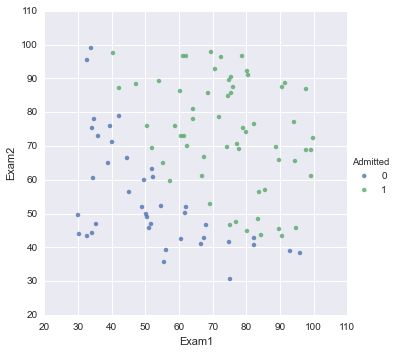

In [6]:
sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=False);

Seaborn is great and we can redo that plot with regression fits for our differently labelled data. This emphasizes the separation between the two sets of data (although it will not often be this obvious). 

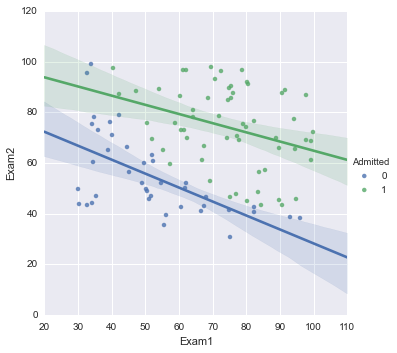

In [7]:
sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=True);

Now let's define the sigmoid function $g(z) = \frac{1}{1+e^{-z}}$ so we can use it in our hypothesis.

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Let's plot the sigmoid function to visualize the fact that when $H(x) > 0$, $y \rightarrow 1$, whereas when $H(x) < 0$, $y \rightarrow 0$.

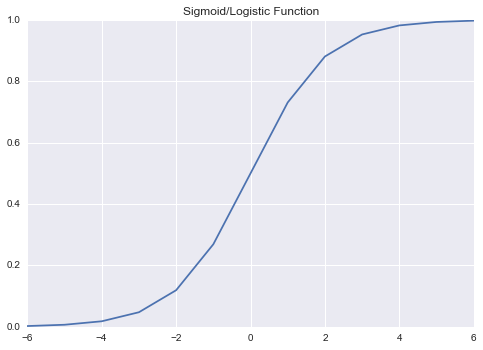

In [9]:
x = [i for i in xrange(-6, 7)]
y = [sigmoid(i) for i in xrange(-6,7)]
plt.title('Sigmoid/Logistic Function')
plt.plot(x,y);

To ensure our function is working, we'll test it with a few values. Larger values should asymptote to 1 whereas smaller values should approach 0.  As shown above, $g(0) = 0.5$

In [10]:
print 'Sigmoid  0: %s' % sigmoid(0) 
print 'Sigmoid  1: %.2f' % sigmoid(1)
print 'Sigmoid -1: %.2f' % sigmoid(-1)
print 'Sigmoid 10: %.5f' % sigmoid(10)

Sigmoid  0: 0.5
Sigmoid  1: 0.73
Sigmoid -1: 0.27
Sigmoid 10: 0.99995


Our code even works with matrices and vectors!

In [11]:
a = np.array([[0,1], [-1,10]])
print a
print 
print sigmoid(a)

[[ 0  1]
 [-1 10]]

[[ 0.5         0.73105858]
 [ 0.26894142  0.9999546 ]]


Now we'll implement the Cost Function for Logistic Regression:
$$ J(\theta) = -\frac{1}{m} \big( log(g(X\theta))^T \cdot \vec{y} + log(1-g(X\theta))^T\cdot(1-\vec{y})\big) $$

In [12]:
def cost_function(theta, X, Y):
    g_xo = sigmoid(np.dot(X, theta))
    p1 = np.dot(np.log(g_xo).T, Y)
    p2 = np.dot(np.log(1-g_xo).T, (1-Y))
    return float((-1.0/(len(X))) * (p1 + p2))

A. Ng says we should get a value of .693 if we were starting with a $\theta$ initialized at zero.

In [13]:
X = np.array(data.drop('Admitted', 1))
Y = np.array([data['Admitted']]).T
theta = np.array([[0,0,0]]).T
print 'Cost_Fn should return 0.693, and we get: %.3f' % cost_function(theta, X, Y)

Cost_Fn should return 0.693, and we get: 0.693


Now we'll optimize our parameters ($\theta$) by utilizing a minimization algorithm.

In [14]:
np.shape(theta)

(3, 1)

In [15]:
sp.optimize.minimize(cost_function, theta, args=(X, Y), method = 'Nelder-Mead')

  status: 0
    nfev: 287
 success: True
     fun: 0.20349770159021519
       x: array([-25.16130062,   0.20623142,   0.20147143])
 message: 'Optimization terminated successfully.'
     nit: 157

Now that we've optimized for our $\theta$ parameters, we can draw the boundary line. This is not as intuitive as it may appear since we now have 3 values for both $\theta$ and $X$. We know that when $\theta\cdot X = 0$, the sigmoid function returns $0.5$, which defines our boundary line.  So: 

$0 = -25.16(x_0) + 0.206(x_1) + 0.201(x_2)$.  Since we want to solve for a line, we'll solve for $x_2$.

$$x_2 = \frac{-25.16x_0 + 0.206x_1}{0.201}$$

$$x_2 = \frac{-25.16}{0.201} + \frac{0.206}{0.201}x_1$$

$$x_2 = mx + b = -1.025x_1 + 125.17$$

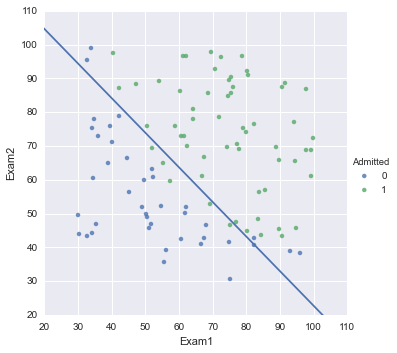

In [16]:
y = [x*-1.025 + 125.17 for x in xrange(110)]
x = [x for x in xrange(110)]
g = sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=False)
plt.xlim([20,110])
plt.ylim([20,110])
plt.plot(x,y);

A. Ng says the probability of a student being admitted with an Exam1 of 45 and an Exam2 of 85 is 0.776. 

$H(x) = g(\theta\cdot X) = sigmoid(\theta\cdot X)$

In [17]:
print 'Student should have a 78% chance of passing. We get {}'.format(sigmoid(-25.1613 + 45*.20623 + 85*.20147))

Student should have a 78% chance of passing. We get 0.776259504629


In [18]:
def predict(X, Y, theta):
    guesses = 0
    for i in xrange(len(X)):
        row = np.array([X[i]])
        if sigmoid(np.dot(row, theta)) >= 0.5:
            if Y[i] == 1:
                guesses += 1
        else:
            if Y[i] == 0:
                guesses += 1
    return guesses*1.0 / len(X)

In [19]:
theta = np.array([[-25.1613, .20623, .20147]]).T # From optimization
print 'Our ability to predict admittance is: {}%'.format(predict(X, Y, theta)*100)

Our ability to predict admittance is: 89.0%


# Regularization

Regularization is designed to address the problem of overfitting.
**High bias** or **underfitting** is when the form of our hypothesis maps poorly to the trend of the data. It is usually caused by a function that is too simple or uses too few features.
At the other extreme, **overfitting** or **high variance** is caused by a hypothesis function that fits the available data but does not generalize well to predict new data. It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.
This terminology is applied to both linear and logistic regression.
There are two main options to address the issue of overfitting:


    1.Reduce the number of features.
        Manually select which features to keep.
        Use a model selection algorithm (studied later in the course).
    2.Regularization
        Keep all the features, but reduce the parameters $\theta_j$
        Regularization works well when we have a lot of slightly useful features.

# Regularized Logistic Regression

In this part of the exercise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [20]:
data = pd.read_csv('Exercises_2/ex2/ex2data2.txt', header=None, names=['Test1', 'Test2', 'Accepted'])

In [21]:
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


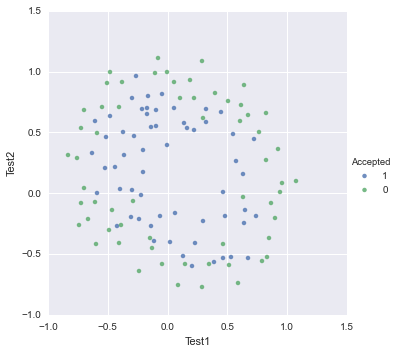

In [22]:
sns.lmplot(x='Test1', y='Test2', data=data, hue='Accepted', fit_reg=False);

One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power. News to me, this does not actually mean up to $(x_1^6) (x_2^6)$ but the exponents added equals up to 6.

In [23]:
degrees = 6
for i in xrange(0,degrees+1):
    for j in xrange(0,i+1):
        data['(x1^{})(x2^{})'.format(i-j,j)] = (data['Test1']**(i-j)) * (data['Test2']**j)

In [24]:
data.head()

,Test1,Test2,Accepted,(x1^0)(x2^0),(x1^1)(x2^0),(x1^0)(x2^1),(x1^2)(x2^0),(x1^1)(x2^1),(x1^0)(x2^2),(x1^3)(x2^0),...,(x1^2)(x2^3),(x1^1)(x2^4),(x1^0)(x2^5),(x1^6)(x2^0),(x1^5)(x2^1),(x1^4)(x2^2),(x1^3)(x2^3),(x1^2)(x2^4),(x1^1)(x2^5),(x1^0)(x2^6)
0,0.051267,0.69956,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,-0.092742,0.68494,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,-0.213710,0.69225,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,-0.375000,0.50219,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,-0.513250,0.46564,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. We will implement regularized logistic regression to fit the data and see how regularization can help combat the overfitting problem.

Recall that the regularized cost function in logistic regression is:

$$J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$

In [68]:
def reg_cost_fn(theta, X, y, lam):
    J, reg = 0, 0
    for i in xrange(len(data)):
        x = np.atleast_2d(X[i])
        p1 = y[i] * np.log( sigmoid(np.dot(x, theta)) )
        p2 = (1-y[i]) * np.log(1 - sigmoid(np.dot(x, theta)))
        J += p1 + p2
    J *= -(1.0/len(data))
    
    # Add the regularization component
    for j in xrange(1,len(X[0])):
        reg += theta[j]**2
    reg *= lam*1.0/(2*len(data))
    
    return float(J + reg)

When converting from panda series/columns to numpy be aware of the fact that a traditonal 1d vector in numpy cannot be transposed. A vector can be forced to take on an additional dimension by using `np.atleast_2d()` when converting from dataframe to numpy array.  This transformation always creates a **row vector**.  Therefore, if we want to produce a single number from vector multiplication, we transpose the second element into a column vector. $X * \theta^T$.

Let's define our values for the cost function: $X$, $y$, and $\theta$.

In [69]:
y = data['Accepted'].values

X = data.drop(['Test1', 'Test2', 'Accepted'], 1)
X = np.array(X)

theta = np.array([[0 for x in xrange(28)]]).T

A. Ng says that with a $\theta$ initialized at zero ($\lambda$ can be anything since all of our thetas are zero) should produce a base cost of 0.693. (Which matches our result for unregularized regression).

In [70]:
reg_cost_fn(theta, X, y, 0)

0.6931471805599461

Now we'll attempt to solve for $\theta$ using the the same minimization algorithm we used for standard logistic regression.   We'll solve for $\lambda = 0, 1, 100$

In [133]:
opts = {}
for i in [0,1,100]:
    opts[i] = sp.optimize.minimize(reg_cost_fn, theta, args=(X, y, i), method = 'Nelder-Mead', options={'maxfev' : 100000, 'maxiter' : 100000})

Now we'll store the output arrays as 2D vectors.

In [134]:
thetas = {}
for i in [0,1,100]:
    thetas[i] = np.atleast_2d(opts[i].x)

Unlike the first example, we cannot solve for one of the features explicitly (I spent a long time on this before finding out there is no solution for a $6^{th}$ order polynomial pair). Instead, we'll iterate over our *grid space* of $x_1$ and $x_2$ and determine the value at each of those points. This will create a 3-dimensional surface, but we will flatten it into 2D by plotting it as a contour and visualizing only the $0^{th}$ level.

In [135]:
def map_fn(x1,x2):
    out = []
    degrees = 6
    for i in xrange(0,degrees+1):
        for j in xrange(0,i+1):
            out.append( (x1**(i-j)) * (x2**j))
    return np.atleast_2d(out)

In [141]:
def contour_values(theta):
    x = np.arange(-1,1.5,0.1)
    y = np.arange(-1,1.5,0.1)
    xx, yy = np.meshgrid(x,y,indexing='ij')
    z = np.zeros([len(x), len(y)])

    for i in xrange(len(x)):
        for j in xrange(len(y)):
            val = 0
            z[i][j] = np.dot(map_fn(x[i], y[j]), theta.T)
    return xx, yy, z

With the $\lambda$ value set to 0, no regularization is being applied. This will produce a fit that is *too specific* and is prone to overfitting. Setting $\lambda = 1$ smooths out our fit to be more general and $\lambda = 100$ produces a fit that is too general and thus underfitting. 

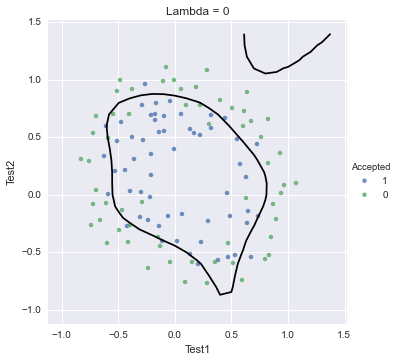

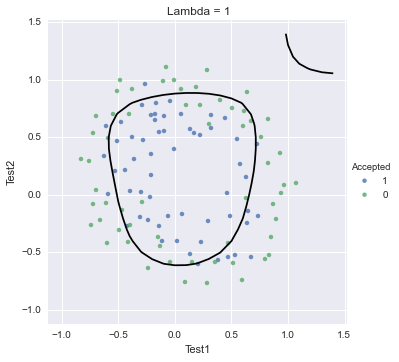

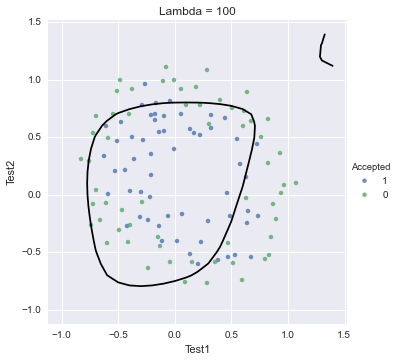

In [142]:
for i in [0,1,100]:
    xx, yy, z = contour_values(thetas[i])
    g = sns.lmplot(x='Test1', y='Test2', data=data, hue='Accepted', fit_reg=False);
    plt.contour(xx, yy, z, 0, linewidth='2', colors='k');
    plt.title('Lambda = {}'.format(i))

And for fun let's utilize last week's code to visualize our polynomial surface and see what it looks like.  The boundary line that gets visualized in 2D is where this surface touches 0 on the $Z$ axis. 

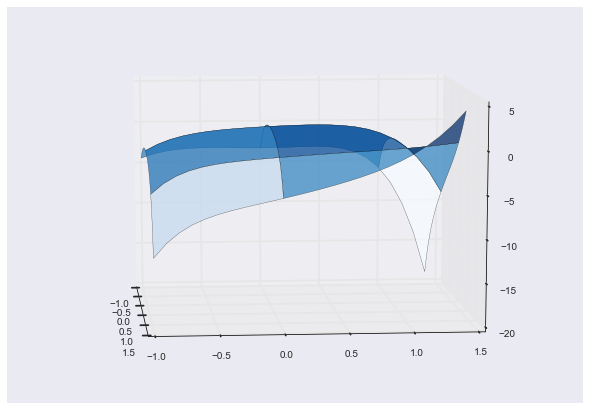

In [180]:
xx, yy, z = contour_values(thetas[1])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xx, yy, z, alpha=0.75, cmap='Blues')
for ii in xrange(0,360,5):
    ax.view_init(elev=10., azim=ii)
    display.display(plt.gcf())
    display.clear_output(wait=True)